In [8]:
import pandas as pd

In [9]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [10]:
hr_df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [11]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [13]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Satisfaction Level Vs Left

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
left = hr_df[hr_df.left == 1]
not_left = hr_df[hr_df.left == 0]

In [16]:
left.shape

(3571, 10)

In [17]:
not_left.shape

(11428, 10)

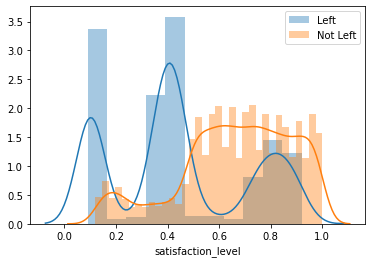

In [18]:
sn.distplot( left['satisfaction_level'], label = 'Left')
sn.distplot( not_left['satisfaction_level'], label = 'Not Left')
plt.legend();

### Last Evaluation Vs Left

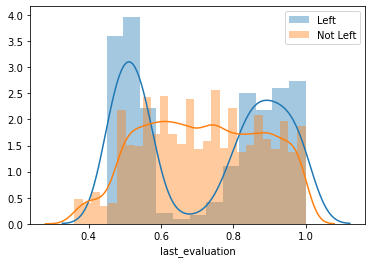

In [19]:
sn.distplot( left['last_evaluation'], label = 'Left')
sn.distplot( not_left['last_evaluation'], label = 'Not Left')
plt.legend();

In [20]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

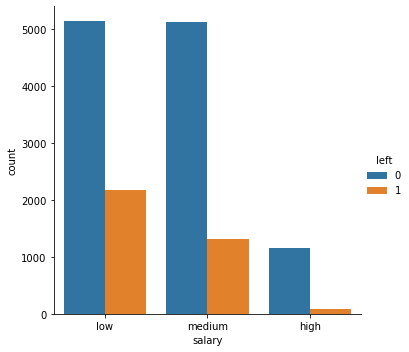

In [21]:
sn.catplot( data = hr_df,
            x = 'salary',
            hue = 'left',
            kind = 'count' );

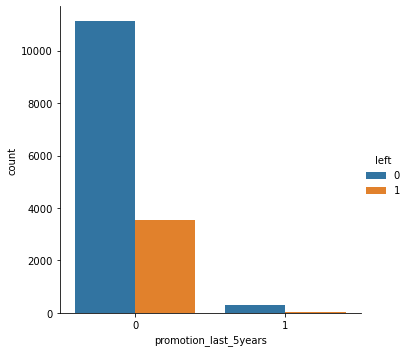

In [22]:
sn.catplot( data = hr_df,
            x = 'promotion_last_5years',
            hue = 'left',
            kind = 'count' );

### Time Spend Company Vs Left

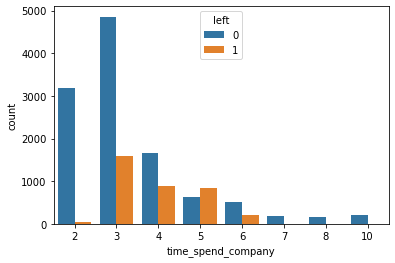

In [23]:
sn.countplot( data = hr_df,
              x = 'time_spend_company',
              hue = 'left' );

In [24]:
pd.crosstab( hr_df.time_spend_company, 
             hr_df.left,
             normalize = 'index')

left,0,1
time_spend_company,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


In [25]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Encoding Categorical Features

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [27]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept', 'salary'] )

In [28]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [30]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept_IT                14999 non-null  uint8  
 9   dept_RandD             14999 non-null  uint8  
 10  dept_accounting        14999 non-null  uint8  
 11  dept_hr                14999 non-null  uint8  
 12  dept_management        14999 non-null  uint8  
 13  dept_marketing         14999 non-null  uint8  
 14  dept_product_mng       14999 non-null  uint8  
 15  de

### Setting X and Y Variables

In [31]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept_IT', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [32]:
X_features = list(hr_encoded_df.columns)

In [33]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [34]:
X_features.remove('left')

In [35]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [36]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [37]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [38]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [41]:
X_train.shape

(11999, 20)

In [42]:
X_test.shape

(3000, 20)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [45]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

In [46]:
logreg_v1.intercept_

array([-0.43333931])

In [47]:
logreg_v1.coef_

array([[-3.98943943,  0.73873499, -0.29983092,  0.00447247,  0.26755044,
        -1.52590437, -1.32314298, -0.10731903, -0.49233668,  0.13250934,
         0.3251929 , -0.42887675,  0.02596327, -0.08657487,  0.03863425,
         0.07297081,  0.13040165, -1.20528878,  0.68193894,  0.13391472]])

In [48]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

{'satisfaction_level': -3.989439431385101,
 'last_evaluation': 0.7387349893465284,
 'number_project': -0.29983092148988116,
 'average_montly_hours': 0.0044724736475718185,
 'time_spend_company': 0.2675504360259739,
 'Work_accident': -1.5259043733542392,
 'promotion_last_5years': -1.3231429845013352,
 'dept_IT': -0.10731902797462946,
 'dept_RandD': -0.4923366805605127,
 'dept_accounting': 0.13250933783827695,
 'dept_hr': 0.32519289535703,
 'dept_management': -0.42887675367803185,
 'dept_marketing': 0.025963270641100638,
 'dept_product_mng': -0.08657487356438291,
 'dept_sales': 0.0386342481222818,
 'dept_support': 0.07297081257342987,
 'dept_technical': 0.13040164557734965,
 'salary_high': -1.205288783815538,
 'salary_low': 0.6819389404047018,
 'salary_medium': 0.13391471774106556}

### Predict on Test Set

- p(y) >= 0.5,  y = 1
- p(y) < 0.5, y = 0

In [49]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [50]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [51]:
y_logreg_v1[0:10]

,actual,predicted
10155,0,0
11688,0,0
12598,1,0
12192,1,0
8678,0,1
8217,0,0
4670,0,0
12086,1,1
5235,0,0
4189,0,0


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.7866666666666666

### Evaluating the model

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm_v1 = confusion_matrix( y_logreg_v1.actual, 
                          y_logreg_v1.predicted,
                          [1,0] )

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [56]:
cm_v1

array([[ 257,  493],
       [ 147, 2103]])

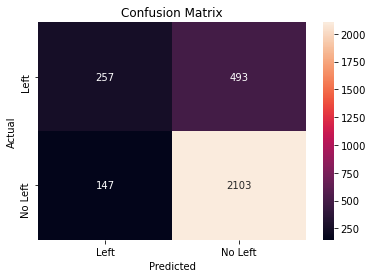

In [57]:
sn.heatmap( cm_v1, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [58]:
(256/(256+497)) # Recall

0.3399734395750332

In [59]:
(256/(256+147)) # Precision

0.6352357320099256

In [60]:
from sklearn.metrics import classification_report

In [61]:
print( classification_report( y_logreg_v1.actual,
                              y_logreg_v1.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.64      0.34      0.45       750

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.76      3000



### KNN Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn_v1 = KNeighborsClassifier(n_neighbors = 10)

In [64]:
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [65]:
knn_pred = knn_v1.predict(X_test)

In [66]:
cm_knn = confusion_matrix(y_test, knn_pred, [1,0])

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


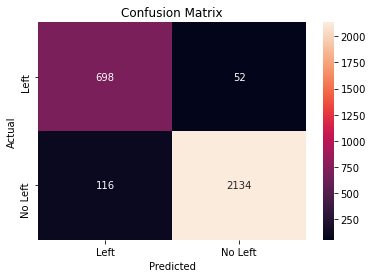

In [67]:
sn.heatmap( cm_knn, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [68]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2250
           1       0.86      0.93      0.89       750

    accuracy                           0.94      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000



In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
knn_v1 = KNeighborsClassifier()

In [71]:
params = { "n_neighbors": [10, 15, 20, 25, 30],
           "weights": ['uniform', 'distance']}

In [72]:
knn_grid = GridSearchCV(knn_v1,
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [73]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [74]:
knn_grid.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [75]:
knn_grid.best_score_

0.9695198356013333

### Building a Decision Tree Model

In [76]:
#!pip install pydotplus

In [78]:
#import pydotplus

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [101]:
tree_v2.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5)

In [103]:
y_tree_pred = tree_v2.predict( X_test )

In [104]:
cm_tree_v2 = confusion_matrix( y_test,
                               y_tree_pred,
                               [1,0] )

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


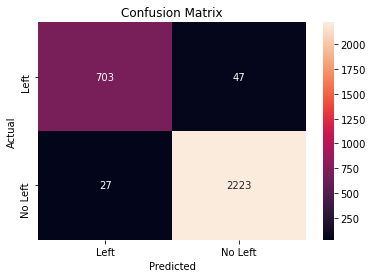

In [105]:
sn.heatmap( cm_tree_v2, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [85]:
print( classification_report( y_test,
                       y_tree_pred ) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [106]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": tree_v2.feature_importances_ } )

In [107]:
features_df.sort_values("importance", ascending = False)

,features,importance
0,satisfaction_level,0.520997
4,time_spend_company,0.158379
1,last_evaluation,0.150478
2,number_project,0.102812
3,average_montly_hours,0.066148
15,dept_support,0.001089
16,dept_technical,0.000097
12,dept_marketing,0.000000
18,salary_low,0.000000
17,salary_high,0.000000


In [88]:
pred_prob = logreg_v1.predict_proba(X_test)

In [89]:
pred_prob[0:10]

array([[0.9134366 , 0.0865634 ],
       [0.90454066, 0.09545934],
       [0.52244143, 0.47755857],
       [0.78124167, 0.21875833],
       [0.18534526, 0.81465474],
       [0.98948757, 0.01051243],
       [0.97168036, 0.02831964],
       [0.36108059, 0.63891941],
       [0.98213903, 0.01786097],
       [0.95830119, 0.04169881]])

In [90]:
left_pred_prob = list(pred_prob[:,1])

In [91]:
pred_1 = list(map(lambda x: 1 if x >= 0.4 else 0, left_pred_prob))

In [92]:
cm_tree_v1 = confusion_matrix( y_test,
                               pred_1,
                               [1,0] )

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [93]:
cm_tree_v1

array([[ 400,  350],
       [ 229, 2021]])

### Visualizing Decision Tree

In [94]:
## Installing pydotplus
!pip install pydotplus

In [95]:
from sklearn.tree import export_graphviz

export_graphviz( tree_v2,
                 out_file = 'tree.model',
                 feature_names = X_features,
                 class_names = ['No Left', 'Left'],
                 filled = True )

import pydotplus as pdot

tree_graph = pdot.graph_from_dot_file( 'tree.model' )

In [96]:
tree_graph.write_jpeg("tree.jpeg")

True

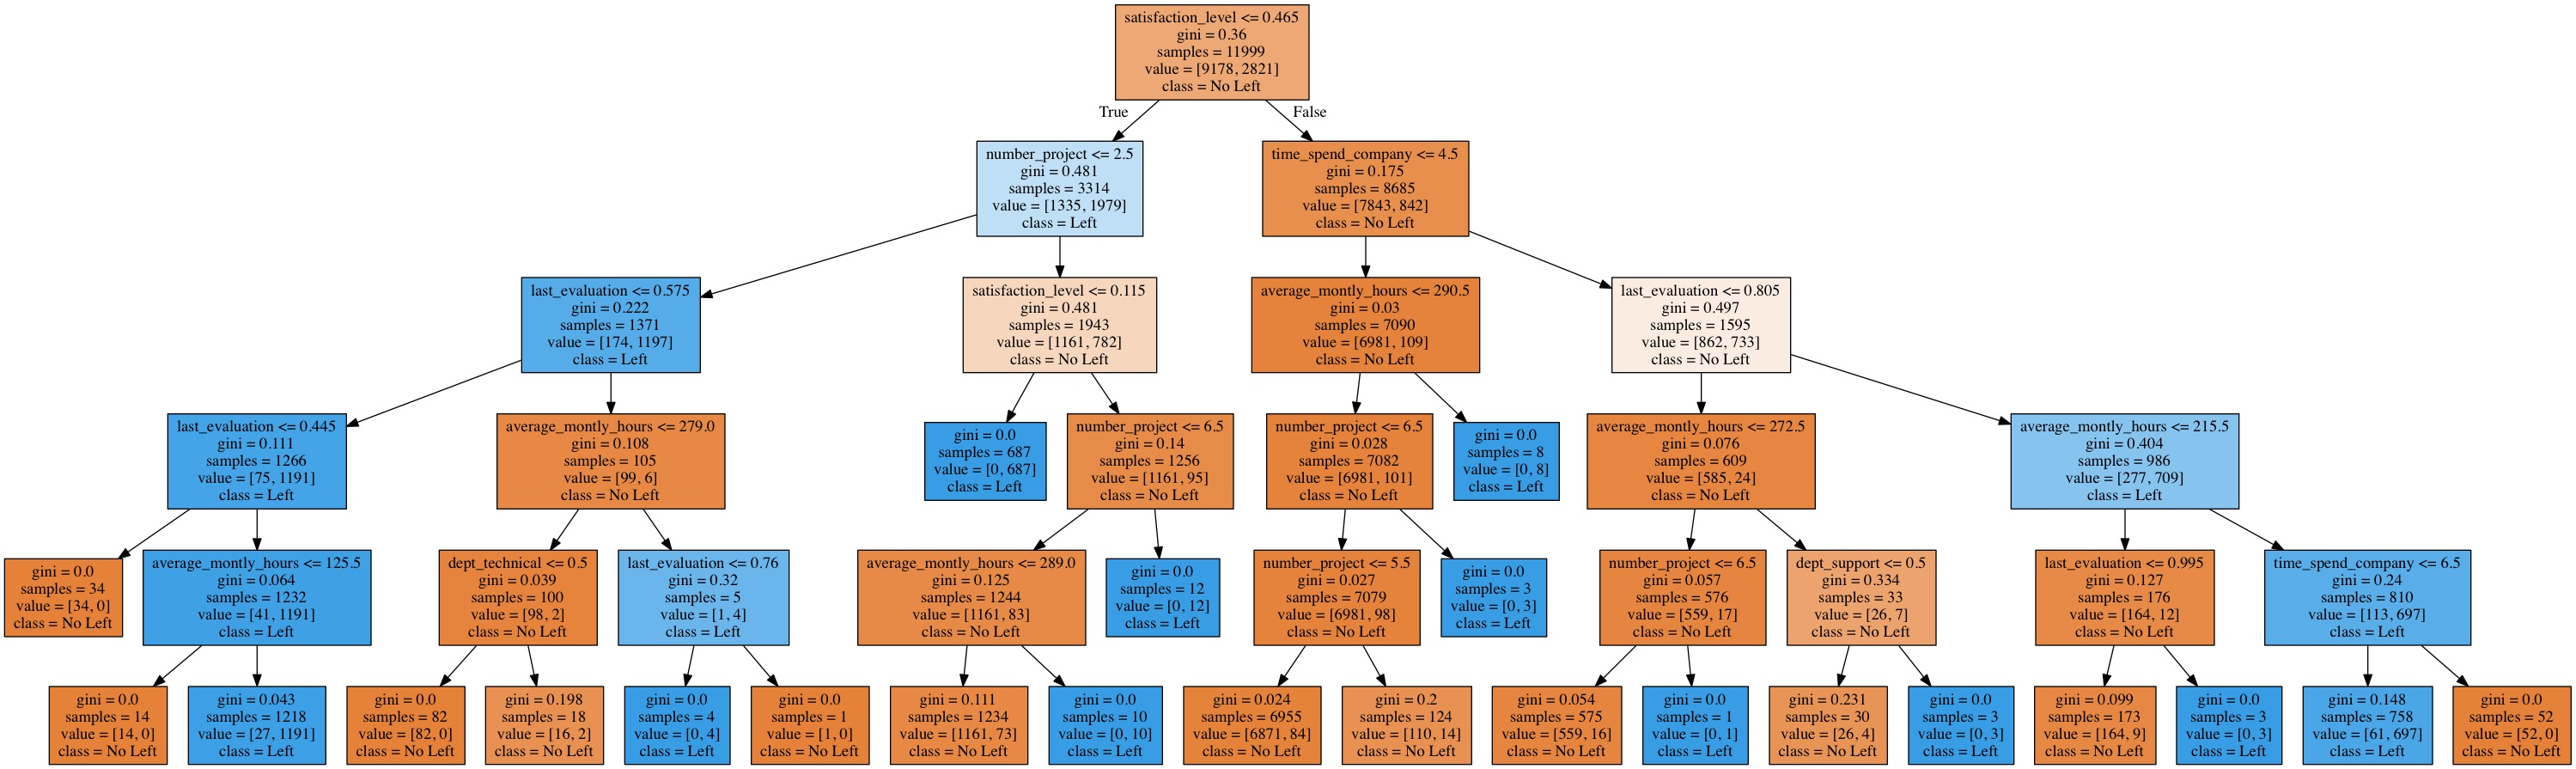

In [97]:
tree_graph.write_jpeg( "tree.jpeg" )

from IPython import display

display.Image( "tree.jpeg" )

In [98]:
from sklearn.tree import plot_tree

In [108]:
plot_tree?

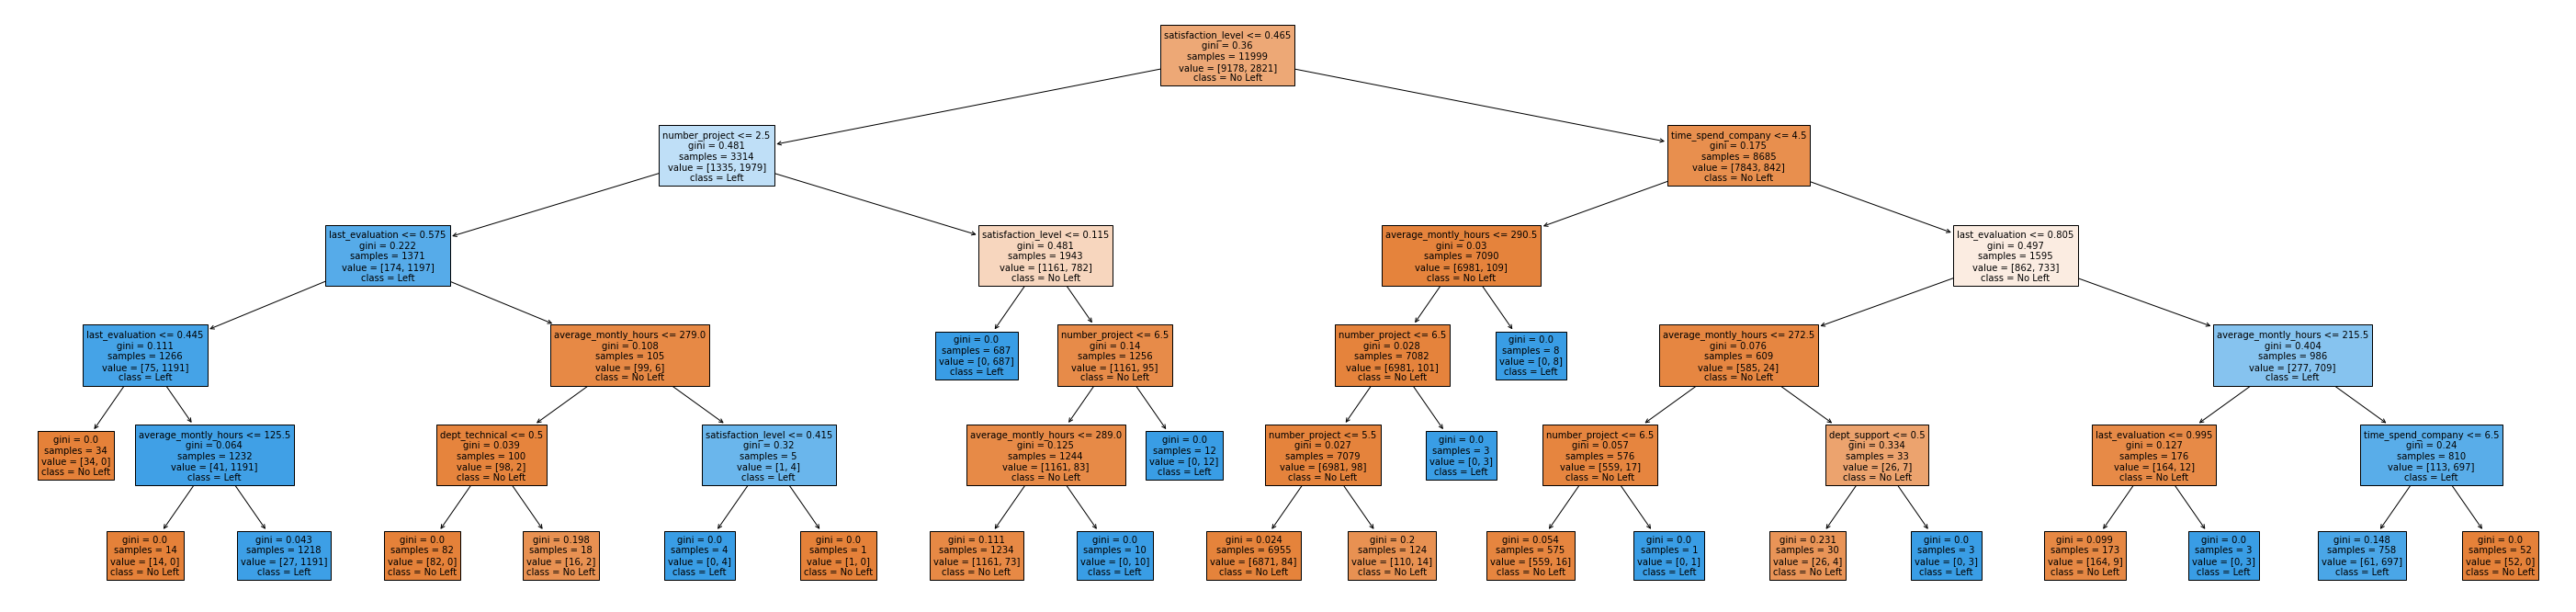

In [109]:
plt.figure(figsize = (50, 12))
plot_tree(tree_v2,
          feature_names = X_features,
          class_names = ['No Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

### Grid Search

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params = { "max_depth": range(3,10),
           "criterion": ['gini', 'entropy']}

In [112]:
grid_v3 = GridSearchCV( DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 10,
                        scoring = 'recall')

In [113]:
grid_v3.fit( X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)},
             scoring='recall')

In [114]:
grid_v3.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [115]:
grid_v3.best_score_

0.9340788913114302

In [116]:
best_model = grid_v3.best_estimator_

In [117]:
grid_v3.cv_results_

{'mean_fit_time': array([0.01241195, 0.01439817, 0.01677425, 0.01911058, 0.02142007,
        0.02462618, 0.02618864, 0.01375015, 0.01477075, 0.01698027,
        0.01926329, 0.02187953, 0.02381945, 0.02564023]),
 'std_fit_time': array([0.00080719, 0.00069812, 0.00063276, 0.00108154, 0.00097653,
        0.0022089 , 0.00157997, 0.00161523, 0.00075029, 0.00078307,
        0.0008277 , 0.00098021, 0.00084175, 0.00057795]),
 'mean_score_time': array([0.0029752 , 0.00297186, 0.00327799, 0.00315173, 0.00318723,
        0.00344129, 0.00315943, 0.0033742 , 0.00304906, 0.00291095,
        0.00303969, 0.0032048 , 0.00340889, 0.00325778]),
 'std_score_time': array([0.00032809, 0.0002816 , 0.00042146, 0.00040437, 0.00034789,
        0.00040562, 0.00031594, 0.00061408, 0.00035674, 0.00020342,
        0.00035748, 0.00026975, 0.00026451, 0.00022619]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entro

### Random Forest Model

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf_v1 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 10,
                               max_features = 0.2,
                               max_samples = 0.4,
                               criterion = 'gini')

In [122]:
rf_v1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.2, max_samples=0.4)

In [123]:
rf_pred_v1 = rf_v1.predict(X_test)

In [124]:
cm_rf = confusion_matrix( y_test, rf_pred_v1, [1,0])

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


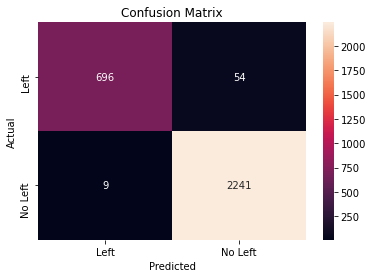

In [125]:
sn.heatmap( cm_rf, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [126]:
print(classification_report(y_test, rf_pred_v1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2250
           1       0.99      0.93      0.96       750

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [127]:
rf_v2 = RandomForestClassifier()

In [128]:
params = { 'n_estimators': [50, 100, 200],
           'max_depth': [5, 10],
           'max_features': [0.2, 0.4],
           'max_samples': [0.4, 0.6],
           'criterion': ['gini', 'entropy'] }

In [129]:
rf_grid = GridSearchCV(rf_v2,
                       param_grid=params,
                       cv = 10,
                       scoring = 'f1')

In [130]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': [0.2, 0.4], 'max_samples': [0.4, 0.6],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [131]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.4,
 'max_samples': 0.6,
 'n_estimators': 50}

In [132]:
rf_grid.best_score_

0.9575763831743945

In [134]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=0.4, max_samples=0.6,
                       n_estimators=50)

In [135]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": rf_grid.best_estimator_.feature_importances_ } )

In [137]:
features_df = features_df.sort_values('importance', ascending=False)

In [138]:
features_df['cumsum'] = features_df.importance.cumsum()

In [139]:
features_df

,features,importance,cumsum
0,satisfaction_level,0.372819,0.372819
4,time_spend_company,0.201499,0.574318
2,number_project,0.168253,0.742571
3,average_montly_hours,0.120444,0.863016
1,last_evaluation,0.113783,0.976799
5,Work_accident,0.004402,0.981201
18,salary_low,0.003690,0.984890
17,salary_high,0.002747,0.987637
16,dept_technical,0.002323,0.989960
14,dept_sales,0.001625,0.991585


### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier( n_neighbors = 10, weights = 'distance' )

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
params = { "n_neighbors": [5, 10, 15, 20],
           "weights" : ['uniform', 'distance']}

In [ ]:
knn_grid = GridSearchCV( KNeighborsClassifier(),
                         param_grid = params,
                         cv = 10,
                         scoring = 'recall')

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_params_

In [ ]:
knn_grid.best_score_

In [ ]:
knn_grid.best_estimator_